# Question 1 Assessment #

#### 1.1 : Do seasoned beer reviewers have clear patterns in their ratings, and can we distinguish between those who consistently rate high, those who consistently rate low, and those who never rate below a certain threshold (e.g., 3/5)?

#### *Proposed Solution:* 
In order to prove feasiblity, ratings_with_text_rb.txt file in the matched_beer_data is evaluated. This file is not in encoded in conventional excel format(s) which means that further processing is required to acheive the desired dataframe. As a proof of concept, a subset of *N* reviewers with highest number of beer reviews is taken and the distribution of their ratings are plotted. From the same subset, one can extract the number of occasions they have given a bad rating ( for instance 3/5 or below ) to a beer. 

In [153]:
#import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [154]:
# read the ratings_with_text_rb.txt file in key:value format 
data_file = "C:/Users/Parsa/Downloads/matched_beer_data.tar/matched_beer_data/ratings_with_text_rb.txt"
read_data = pd.read_csv(data_file, sep=":", header=None, names=["Key", "Value"])

In [155]:
# rearrange the read datafile to conventional dataset
selected_col = read_data['Key'].unique()
df = pd.DataFrame(columns=selected_col, dtype = object)

for col in selected_col:
    df[col] = read_data[read_data['Key'] == col]['Value'].values 

In [156]:
df.head(10)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1429178400,ciaranc,151109,3,7,2,8,17,3.70,"Bottle, gift from Aaron. Black, big head, lot..."
1,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1427796000,Rowlymo,198957,4,7,4,8,15,3.80,500ml Bottle in Bittles bar Belfast. Chocolat...
2,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1421665200,Don2711,285162,4,8,5,7,17,4.10,Great one and made very local to me. Bottle b...
3,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1380621600,genegenie,224156,5,8,3,5,19,4.00,"Deep roasted aroma, good dark brown/black col..."
4,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1371549600,kiwianer,88501,4,7,4,7,14,3.60,"The head is medium, the body black. It smells..."
5,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1321527600,Beersiveknown,128086,5,7,5,7,16,4.00,Cask@ Belfast beer fest. Dark brown black wit...
6,Ards Pig Island Pale Ale,160664,Ards Brewing Co.,13538,Bitter,5.2,1382436000,Beersiveknown,128086,4,7,4,5,13,3.30,"Bottle at Bittles Bar, BelfastHazy amber brow..."
7,Ards Pig Island Pale Ale,160664,Ards Brewing Co.,13538,Bitter,5.2,1371549600,kiwianer,88501,4,7,3,5,14,3.30,"The head is stable, the body golden, orange. ..."
8,Ards Pig Island Pale Ale,160664,Ards Brewing Co.,13538,Bitter,5.2,1385550000,genegenie,224156,5,8,4,9,18,4.40,Hard to find but worth it when you do. A refr...
9,Ards Pig Island Pale Ale,160664,Ards Brewing Co.,13538,Bitter,5.2,1339581600,visionthing,91324,4,7,4,7,14,3.60,"50cl bottle (4,8% ABV) at Bittles Bar, Belfas..."


In [157]:
# the useful columns are kept and users with highest ranking are displayed
reviewer_rating = df[['user_name', 'rating']].copy()
num_reviews = reviewer_rating.groupby(['user_name']).size().reset_index(name='count').sort_values('count', ascending =False)
num_reviews.head(10)

,user_name,count
27486,yespr,5209
17337,fonefan,5160
11922,Ungstrup,4149
11750,Travlr,3819
13082,anders37,3732
19539,joergen,3241
21118,madmitch76,3229
22878,oh6gdx,3051
22953,omhper,2954
15103,cgarvieuk,2856


In [158]:
# filter reviewers with less than 50 reviews  
num_reviews_filter = num_reviews[num_reviews['count'] > 50]
print("Initial size: " + str(len(num_reviews)))
print("Size after filtering: " + str(len(num_reviews_filter)))

Initial size: 27674
Size after filtering: 3099


In [159]:
#take the first N reviewers and plot the score distribution in box plot 
N = 10
top_reviewers = num_reviews_filter.head(N).user_name
df_top_reviewers = df.merge(right=top_reviewers, on=['user_name'], how='right')[['user_name', 'rating']]
df_top_reviewers['rating'] = pd.to_numeric(df_top_reviewers['rating']) 

In [160]:
# check for NaNs 
print("Number of NaNs in ratings: " + str(df_top_reviewers.rating.isna().sum()))

Number of NaNs in ratings: 0


Text(0.5, 1.0, '')

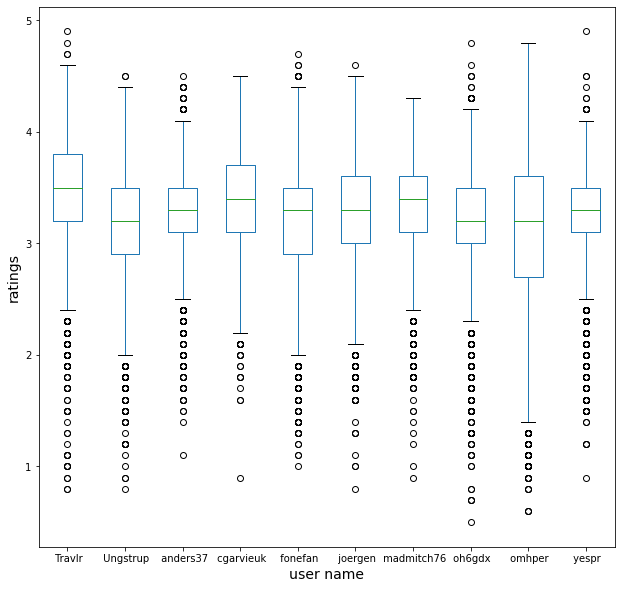

In [161]:
#Box plots displaying the distribution of scores of reviewers 
bp = df_top_reviewers.boxplot(by='user_name', figsize=(10,10), grid=False, fontsize = 10)
bp.get_figure().suptitle('')
bp.set_ylabel('ratings', fontsize = 14)
bp.set_xlabel('user name', fontsize = 14)
bp.set_title('')


In [162]:
# number of bad ratings (rating below the thershold) per top reviewer 
threshold = 3
df_top_reviewers_low_rating = df_top_reviewers[df_top_reviewers["rating"] <= threshold]
num_low_rating_per_user = pd.DataFrame(df_top_reviewers_low_rating['user_name'].value_counts()) 
num_low_rating_per_user.columns.values[0] = 'count'
display(num_low_rating_per_user)

,count
fonefan,1682
Ungstrup,1592
yespr,1272
omhper,1167
oh6gdx,1102
joergen,871
madmitch76,789
anders37,772
Travlr,615
cgarvieuk,588


#### 1.2 : Can we decorrelate a reviewer’s “niceness” from their beer ratings, based on their ratings’ standard deviation and the free-form text in their reviews?

#### *Proposed Solution:* 
The first step would be to extract sentimental information from the reviewer's text in a scale which would be comparable to the user ratings of the beers. As a proof of conecpt, the reviews of only one user is chosen to be anaylzed, since the method is extendable to the whole dataset. For this purpose BERT Mutilingual Sentimental Analysis pretrained model is used. This model is trained on wikipedia pages of 104 languages. The reason of this choice is to cover as many languages possible. For more information on BERT: https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment. By pure coincidence, the sentimental scale used by this classifier (0-5) is the same scale as the beer ratings, with the difference of being categorical. 

In [163]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [164]:
# extract texts from a specific user
text_from_reviewer= df[df["user_name"] == top_reviewers.iloc[0]][["user_name", "rating", "text"]].copy()
text_from_reviewer.head()

,user_name,rating,text
656,yespr,3.10,Pours clear and golden orange with a small wh...
904,yespr,2.00,2.5 L bottle. Pours clear and golden yellow w...
1562,yespr,2.20,50 cL bottle. Pours clear and golden orange w...
1662,yespr,2.50,50 cL bottle. Pours cloudy yellow with a smal...
1829,yespr,2.60,"1 L bottle, courtesy of faeroeviking. Pours c..."


In [165]:
# convert text column to numpy array and take a subset M of the matrix to reduce computational costs
M = 100
text_vector = df['text'].to_numpy()
text_vector_red = text_vector[:M]


In [166]:
#remove stop words as well as invalid characters: 

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in text.split() if word.lower() not in stop_words]
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', ' '.join(tokens))  
    return clean_text

cleaned_text_array = np.vectorize(preprocess_text)(text_vector_red)


In [167]:
# Load pre-trained model and tokenizer for multilingual sentiment analysis &  
# Create sentiment analysis pipeline
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, truncation=True)
sentiment_analysis = pipeline("sentiment-analysis", truncation=True, model=model, tokenizer=tokenizer)

In [168]:
# Predict 
sentiment_score = np.zeros((len(cleaned_text_array), 2), dtype=object)

for i,text in enumerate(cleaned_text_array):
    result = sentiment_analysis(text)
    sentiment_score[i,0] = int(result[0]['label'].split()[0]) #extract the integer score
    sentiment_score[i,1] = result[0]['score']


In [169]:
# Box plots to compare the difference of distributions of text predicted scores 
# and ratings of one reviewer
reduced_reviewer_info = text_from_reviewer.head(M).copy()
reduced_reviewer_info['pred_score'] = sentiment_score[:,0]
reduced_reviewer_info['pred_accu.'] = sentiment_score[:,1]
reduced_reviewer_info.head()

,user_name,rating,text,pred_score,pred_accu.
656,yespr,3.10,Pours clear and golden orange with a small wh...,3,0.379727
904,yespr,2.00,2.5 L bottle. Pours clear and golden yellow w...,5,0.673124
1562,yespr,2.20,50 cL bottle. Pours clear and golden orange w...,5,0.722423
1662,yespr,2.50,50 cL bottle. Pours cloudy yellow with a smal...,4,0.428388
1829,yespr,2.60,"1 L bottle, courtesy of faeroeviking. Pours c...",4,0.389815


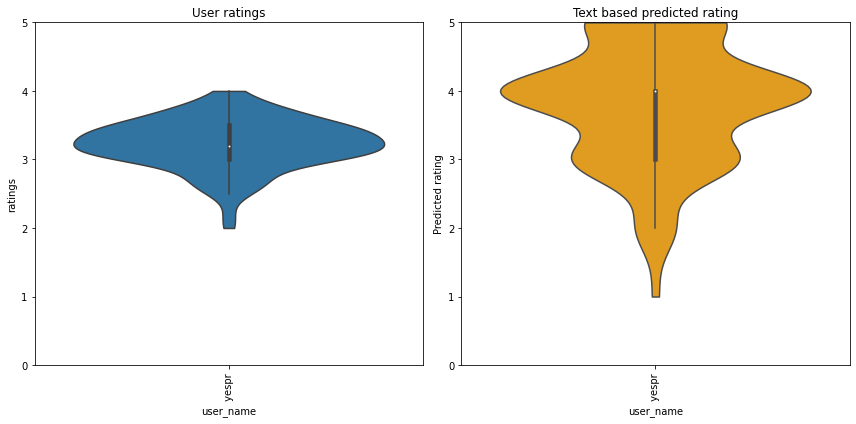

In [170]:
reduced_reviewer_info = reduced_reviewer_info.explode('rating')
reduced_reviewer_info['rating'] = reduced_reviewer_info['rating'].astype('float')

reduced_reviewer_info = reduced_reviewer_info.explode('pred_score')
reduced_reviewer_info['pred_score'] = reduced_reviewer_info['pred_score'].astype('float')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.violinplot(data=reduced_reviewer_info, x="user_name", y='rating', ax=axes[0], cut=0)
axes[0].set_title('User ratings')
axes[0].set_ylabel('ratings')
axes[0].set_ylim([0, 5])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  

sns.violinplot(data=reduced_reviewer_info, x="user_name", y='pred_score', ax=axes[1], cut=0, color = "orange")
axes[1].set_title('Text based predicted rating')
axes[1].set_ylabel('Predicted rating')
axes[1].set_ylim([0, 5])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  

plt.tight_layout()
plt.show()

Already in a reduced set of only 100 samples, these two distributions differ considerably. It will be interesting to evaluate their behavior with the increase in samples.

#### 1.2 :Can we develop a method to combine the standard deviation of ratings and the sentiment of review text to produce “objective” ratings that account for a user’s past rating behavior? This research question aims to delve into the subjective nature of beer reviews and explore the possibility of deriving more objective measures of beer quality. It also seeks to understand the influence of individual reviewer behavior on beer ratings.

#### *Proposed Solution:* 
In other words, a balancing metric is required to even out the inherent biases of the reviewers between putting down an actual score or writing their opininon in text. As displayed above this bias becomes apparent whilst comparing the ratings of a given reviewer with the perceived sentiment from their written review text. The *interpolated rating (ir)* can be expressed with the balancing formula as:

$$  ir = {ratings*(1-\alpha) + sentiment\_rating*\alpha \over 2 } $$

Where for a given user *ratings* represent the given score by the reviewer, *sentiment_rating* the sentimenal analysis score, $\alpha\in[0,1]$ a balancing coefficient which has to be defined as below: 
    
- if the distributions of *ratings* & *sentiment_rating* are **close enough** $\alpha = 0.5$ 
- if the reviewer tends to **overrate** according to the *ratings* & *sentiment_rating* distribution differences  $  \alpha > 0.5$ 
- if the reviewer tends to **underrate** according to the *ratings* & *sentiment_rating* distribution differences  $  \alpha < 0.5$ 